## Exploring tweets containing word "bitcoin" from mid-summer 2016

July 28 - August 6, 2016

This is another small dataset (~3000 tweets), so semantic insight into bitcoin in a way done with charisma data is probably not possible - still may be other interesting patterns.

For this example no attempt is made to remove spammy or repetitive posts.

In general Twords was designed to look at frequencies and semantics for terms likely to be used in casual conversation (like "charisma") more so than terms that likely have a lot of marketing behind them (like "brexit" or "bitcoin"), but people specifically interested in a term like "bitcoin" may still find interesing patterns here.

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit = Twords()
twit.data_path = "../data/java_collector/bitcoin/"
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.set_Search_terms(["bitcoin"])
twit.create_Stop_words()

In [3]:
twit.get_java_tweets_from_csv_list()

In [4]:
# find how many tweets we have in original dataset
print "Total number of tweets:", len(twit.tweets_df)

Total number of tweets: 3097


# Standard cleaning

In [5]:
twit.keep_column_of_original_tweets()
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.remove_punctuation_from_tweets()
twit.drop_non_ascii_characters_from_tweets()
twit.drop_duplicate_tweets()
twit.drop_by_search_in_name()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.012 minutes
Tweets cleaned per minute: 250566.0


In [6]:
len(twit.tweets_df)

1971

In [7]:
twit.keep_tweets_with_terms("bitcoin")

In [8]:
len(twit.tweets_df)

1537

# Create word_freq_df


In [9]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(1000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.004 minutes
Time to compute word bag:  0.002 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  0.5942 minutes


In [10]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background occurrences
1,bitfinex,219,0.015582,14263.997241,9.565494,79
22,amplifies,45,0.003202,10524.804938,9.261490,22
319,ulbricht,7,0.000498,3601.822134,8.189195,10
59,marinecoin,20,0.001423,3548.593236,8.174307,29
148,125k,12,0.000854,3430.306795,8.140405,18
189,megaupload,10,0.000711,3430.306795,8.140405,15
336,vircurex,6,0.000427,3087.276115,8.035044,10
70,bitcoinnews,18,0.001281,2987.686563,8.002255,31
160,dotcom,11,0.000783,2572.730096,7.852723,22
21,coindesk,46,0.003273,2440.115143,7.799801,97


# Plot results with varying background cutoffs


## At least 100 background occurrences:

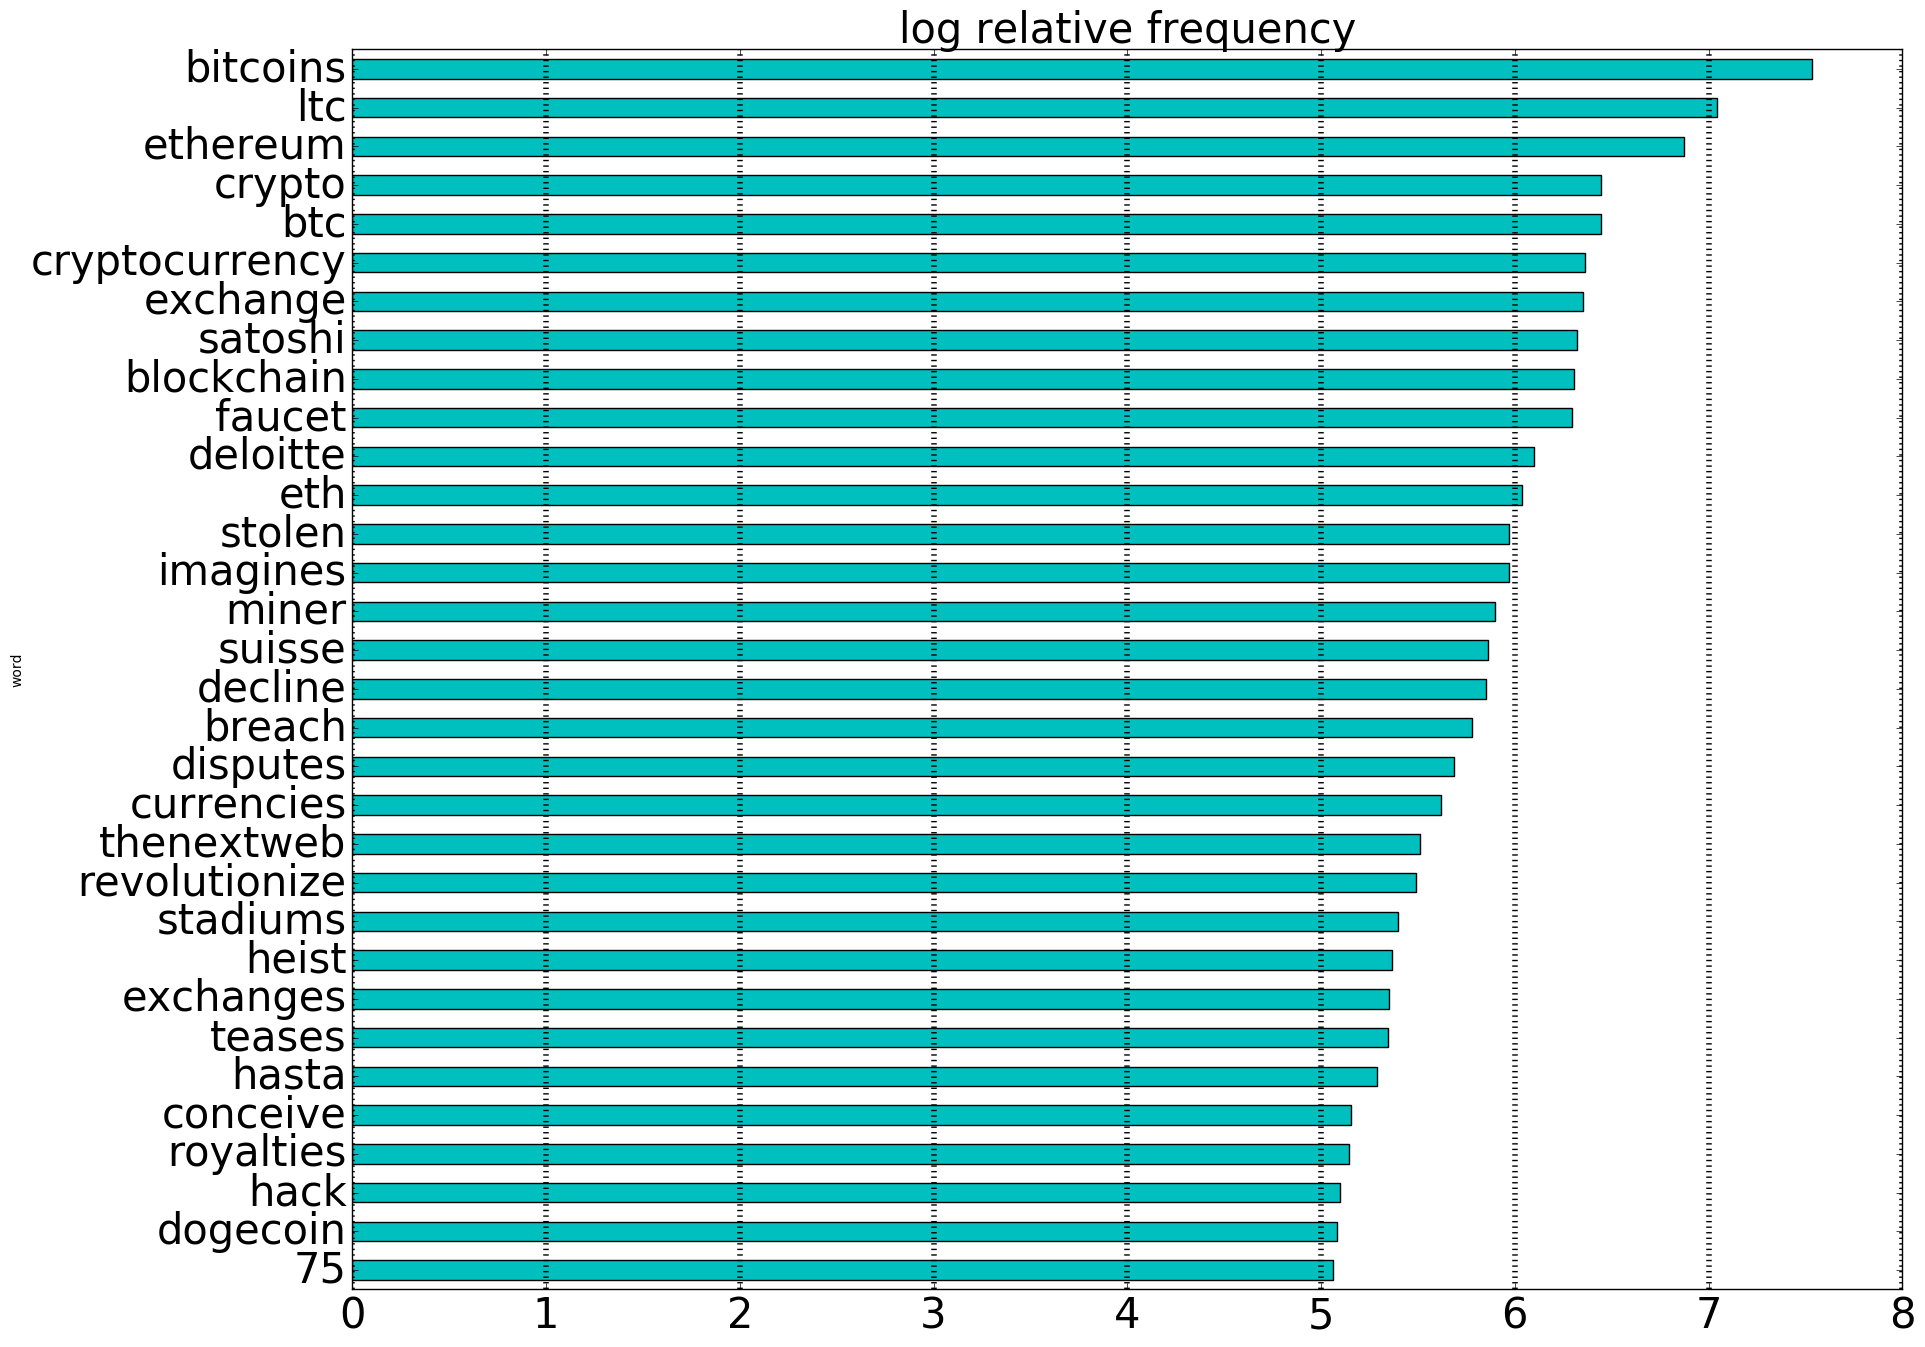

In [11]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 500 background occurrences:

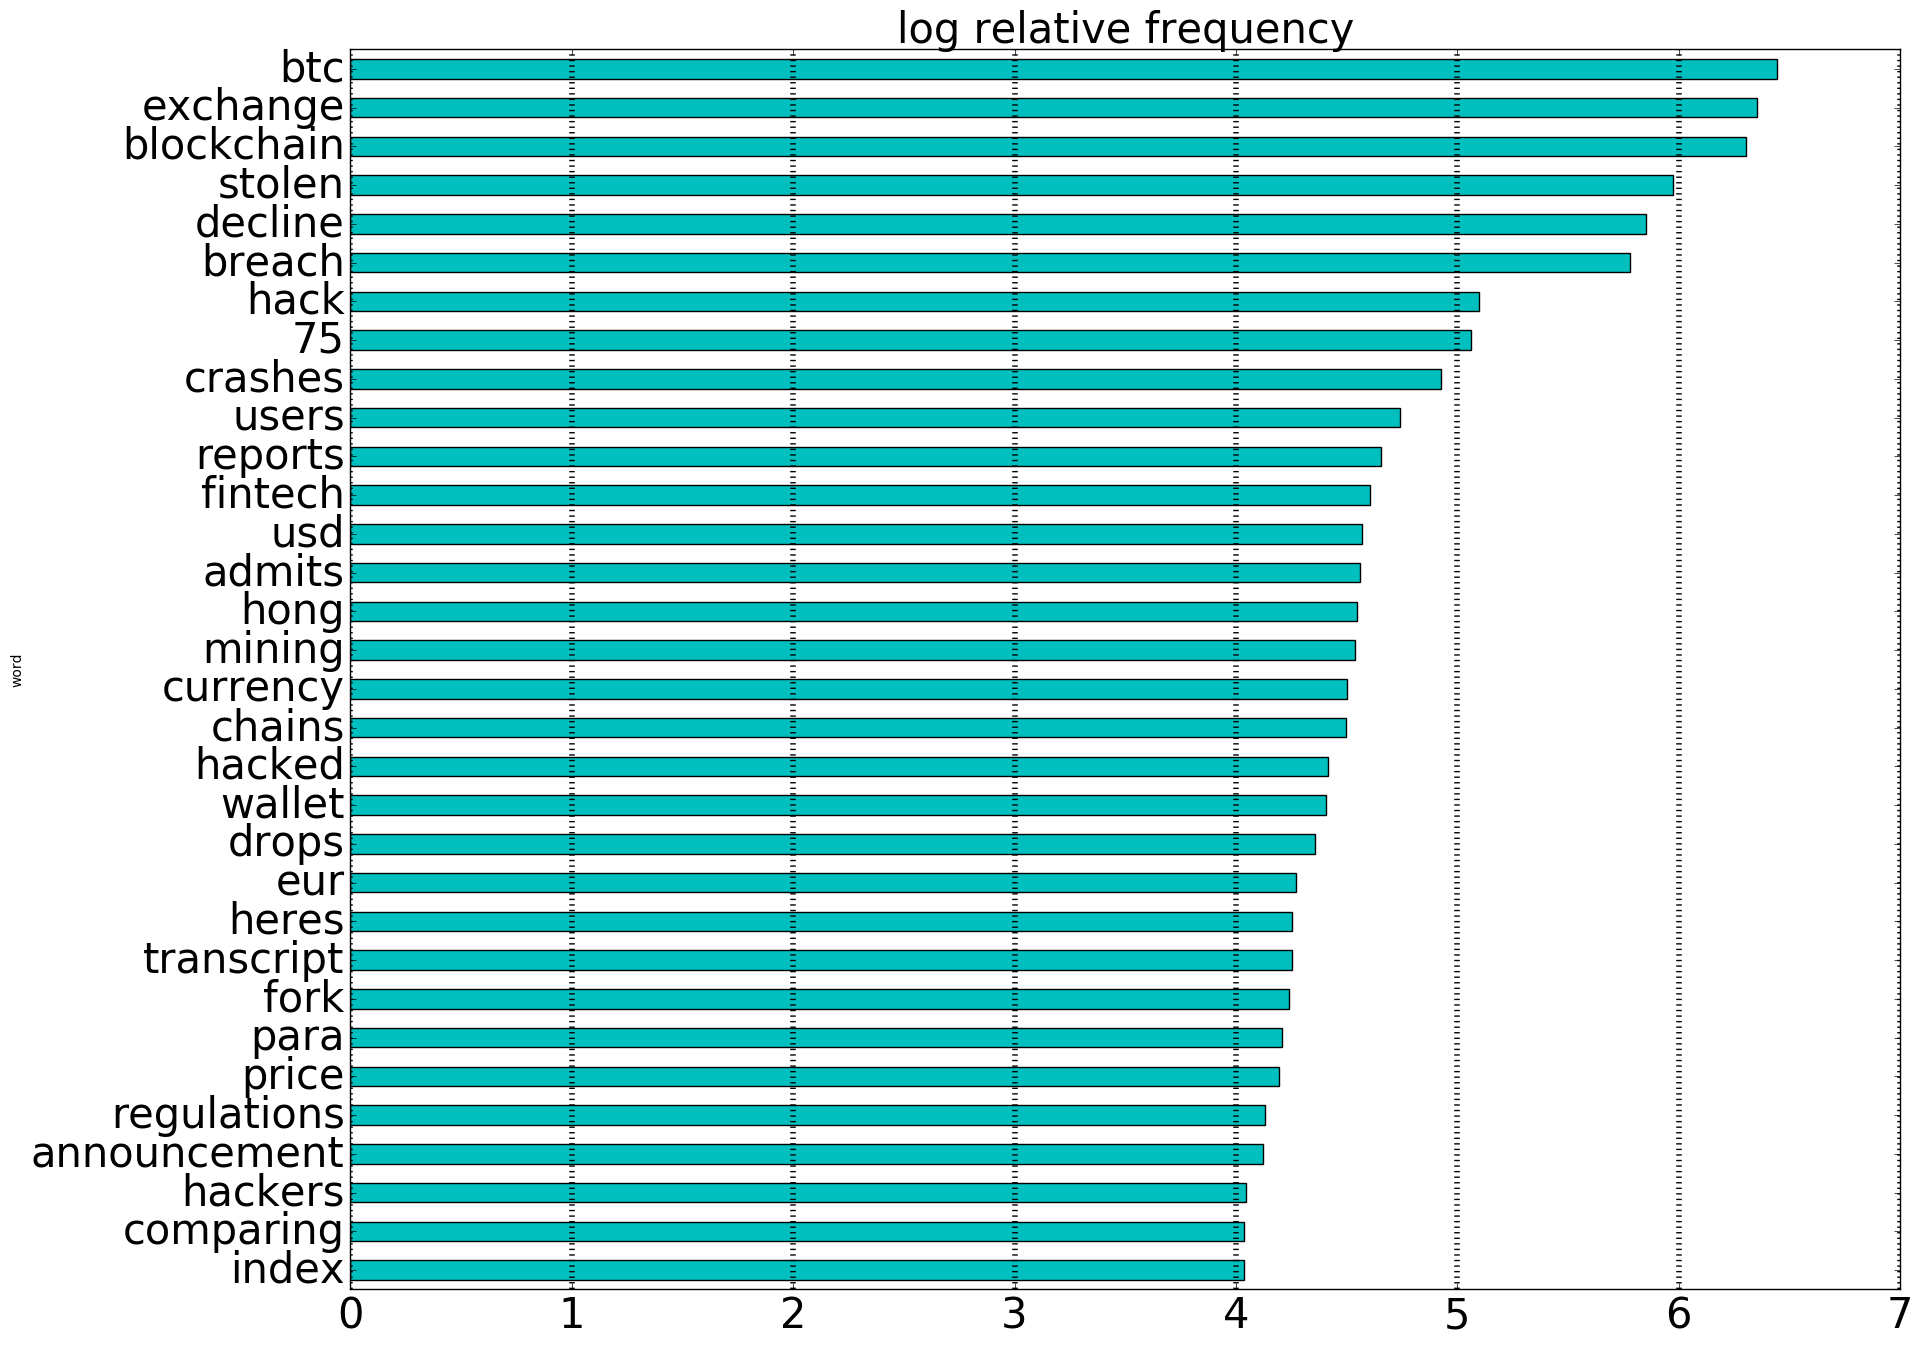

In [12]:
num_words_to_plot = 32
background_cutoff = 500
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

In [13]:
twit.tweets_containing("decline")[:10]

53 tweets contain this term


,username,text
193,montrealapartm,montreal rental apartments bitcoin price in mediumterm decline cryptocoinsnews
303,pixlllpro,chrisdunntv what is your stance on the decline in bitcoin value since the second halving what btc value do you expect by the years end
359,tkforextv,bitcoin price continues mediumtermdecline
413,virtualcoinwave,bitcoin price continues mediumterm decline pictwittercom5396tvey7x
426,diener_gottes,bitcoin drops nearly 20 as exchange hack amplifies price decline bitcoin prices fell
428,mbllngr,modernday augury bitcoin drops nearly 20 as exchange hack amplifies price decline
447,cryptobrokerio,bitcoin drops nearly 20 as exchange hack amplifies price decline coindesk pictwittercomle6onqhjwh
452,blackbulltradn,coindesk bitcoin drops nearly 20 as exchange hack amplifies price decline pictwittercomvko5lv9bmr
462,blackbulltradn,coindesk breaking bitcoin drops nearly 20 as exchange hack amplifies price decline pictwittercomugxv0lopg5
472,bitbrokersinc,bitcoin drops nearly 20 as exchange hack amplifies price decline bitcoin


## At least 2000 background occurrences:

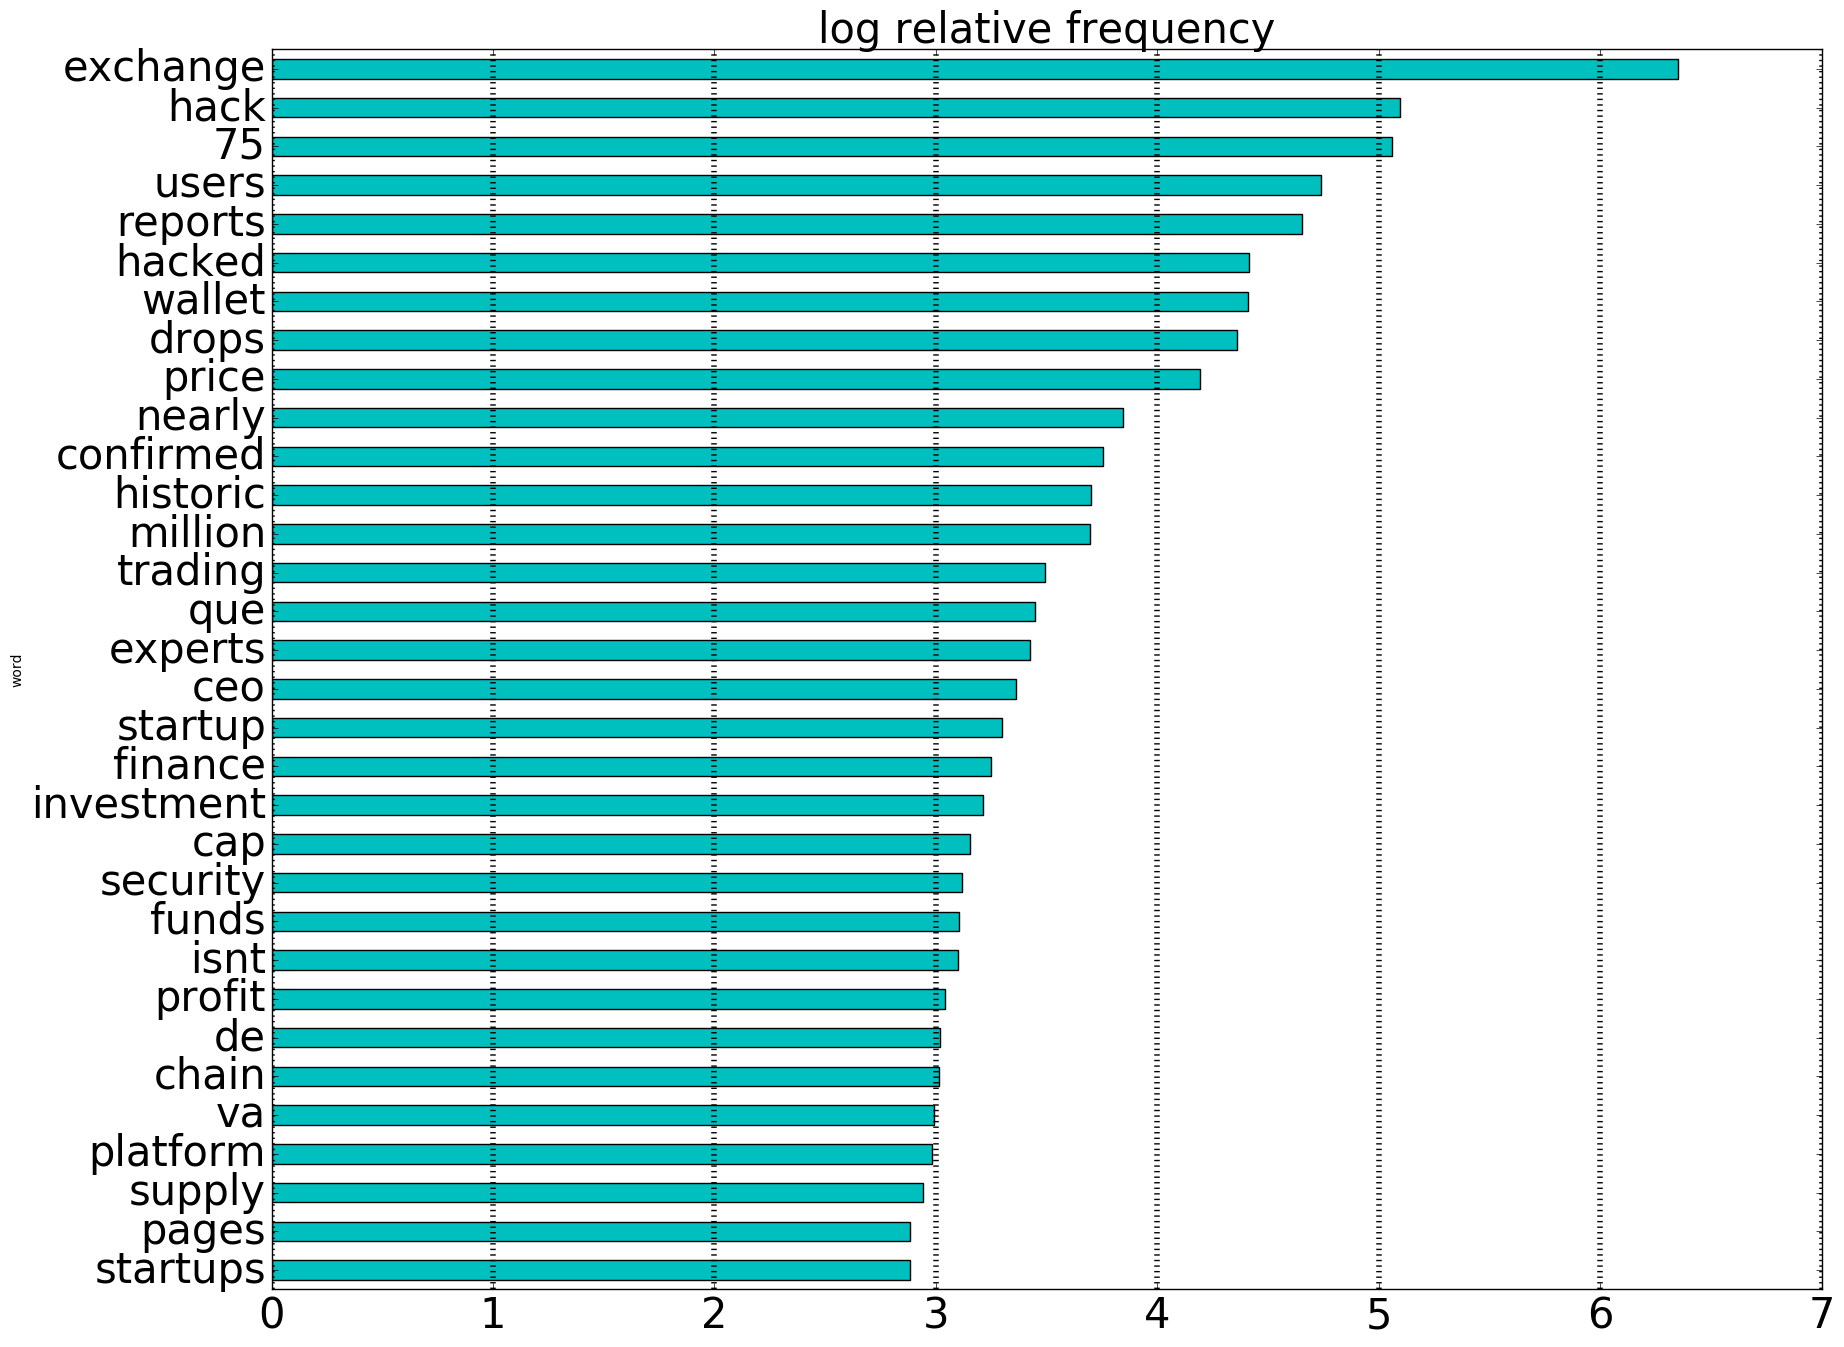

In [14]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

In [15]:
twit.tweets_containing("confirmed")[:10]

22 tweets contain this term


,username,text
439,tm_interesting,it news 119756 btc confirmed stolen from major bitcoin exchange bitfinex
478,hackalertnews,119756 btc confirmed stolen from major bitcoin exchange bitfinex hb
527,zachariepinneau,bitfinex hack usd 60000000 confirmed stolen via r bitcoin
563,romankluka,bitfinex hacked bitcoin confirmed stolen cryptocurrency feedly
574,rhysosborne1,119756 btc confirmed stolen from major bitcoin exchange bitfinex by via hacker news
648,newsyc50,119756 btc confirmed stolen from major bitcoin exchange bitfinex
667,newsycbot,119756 btc confirmed stolen from major bitcoin exchange bitfinex cmts
677,tiktoktikk,119756 btc confirmed stolen from major bitcoin exchange bitfinex by via tiktoktikk pictwittercombckcjpi1k8
807,hackernewsrobot,119756 btc confirmed stolen from major bitcoin exchange bitfinex
824,silverbacklive,119756 btc confirmed stolen from major bitcoin exchange bitfinex startup dubai gcc
